# Problem Statement:

### We are working for a U.S. based bike company boombikes which makes bikes available for shared use to individuals on a short term basis for a price or free. During corona times, their business sees a considerable dip so they want to build a multiple linear regression model for the prediction of demand for shared bikes in future so that they can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### The company wants to know

* Which variables are significant in predicting the demand for shared bike
* How well those variables describe the bike demands


### Data loading and  understanding

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading csv file
df=pd.read_csv("day.csv")

In [3]:
# checking first 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

### So there are 730 observations and 16 features in dataset with target variable included.

### As given in problem statement cnt is target variable and rest other are predictor variables.

In [5]:
# checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no missing values in any column

In [6]:
# to check all column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### All features are int or float type except date

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# printing instant column
df["instant"]

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

### Clearly instant is column which is just numbering only so we can drop it.

In [9]:
#dropping instant column
df=df.drop("instant",axis=1)

In [10]:
print(df.shape)
df.head()

(730, 15)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Other columns to drop

* Since dteday is date from which we can extract year, month , date but year and month are already given as seprate column and date(1 to 31) is not useful so we can drop this column.

* we can drop casual feature and registerd feature as they are not important in prediction as well.


In [11]:
df=df.drop(["dteday","casual","registered"],axis=1)

In [12]:
print(df.shape)
df.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# descriptive statistics information
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [14]:
# printing all the columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
# to check what all kind of values each feature are taking
for i in df.columns:
    print(i+" "+"="*15,"\n",df[i].value_counts(),"\n")

season =============== 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64 

yr =============== 
 0    365
1    365
Name: yr, dtype: int64 

mnth =============== 
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

holiday =============== 
 0    709
1     21
Name: holiday, dtype: int64 

weekday =============== 
 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

workingday =============== 
 1    499
0    231
Name: workingday, dtype: int64 

weathersit =============== 
 1    463
2    246
3     21
Name: weathersit, dtype: int64 

temp =============== 
 26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

atemp =============== 
 32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
    

### Data Visualization or EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Univariate Analysis

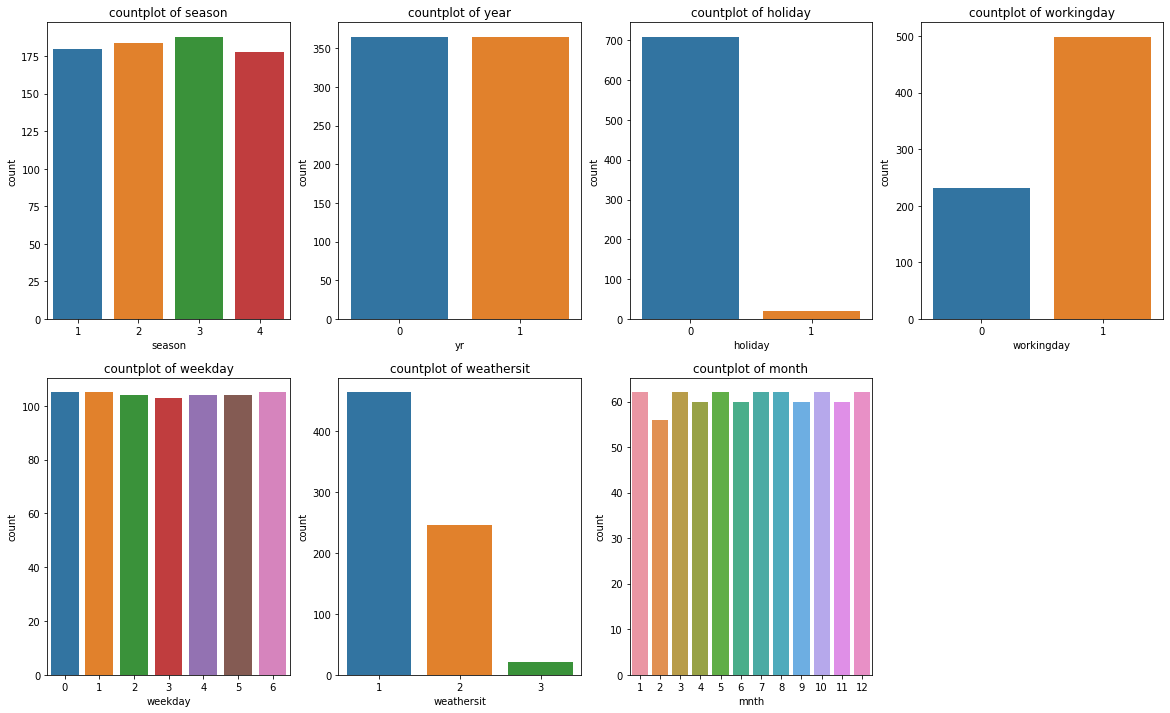

In [17]:
# frequency distribution
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
plt.title("countplot of season")
sns.countplot(df["season"])

plt.subplot(2,4,2)
plt.title("countplot of year")
sns.countplot(df["yr"])

plt.subplot(2,4,3)
plt.title("countplot of holiday")
sns.countplot(df["holiday"])

plt.subplot(2,4,4)
plt.title("countplot of workingday")
sns.countplot(df["workingday"])

plt.subplot(2,4,5)
plt.title("countplot of weekday")
sns.countplot(df["weekday"])

plt.subplot(2,4,6)
plt.title("countplot of weathersit")
sns.countplot(df["weathersit"])

plt.subplot(2,4,7)
plt.title("countplot of month")
sns.countplot(df["mnth"])

plt.show()

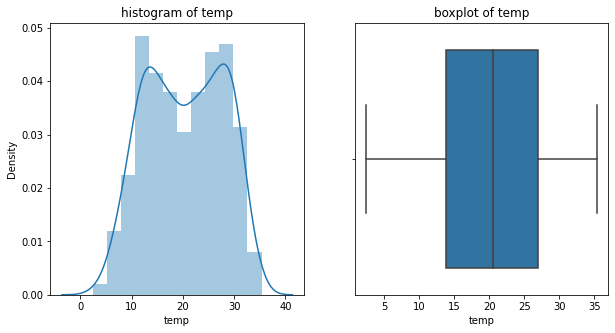

In [18]:
# histogram and boxplot
plt.figure(figsize=(10, 5))


plt.subplot(1,2,1)
plt.title("histogram of temp")
sns.distplot(df["temp"])


plt.subplot(1,2,2)
plt.title("boxplot of temp")
sns.boxplot(df["temp"])

plt.show()

### No outlier is there.

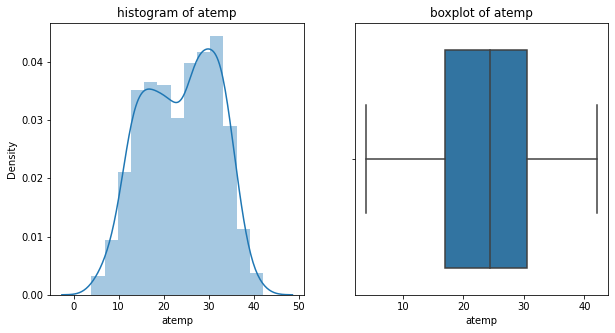

In [19]:
# histogram and boxplot
plt.figure(figsize=(10, 5))


plt.subplot(1,2,1)
plt.title("histogram of atemp")
sns.distplot(df["atemp"])


plt.subplot(1,2,2)
plt.title("boxplot of atemp")
sns.boxplot(df["atemp"])

plt.show()

### No outlier is there.

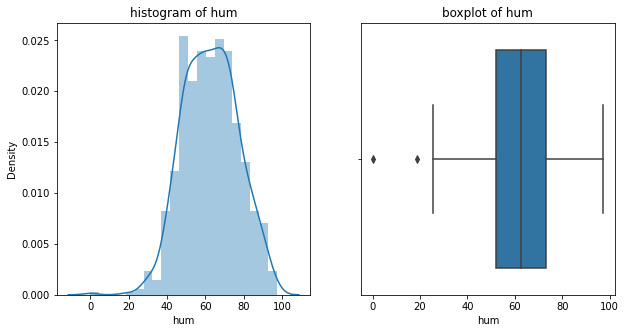

In [20]:
# histogram and boxplot
plt.figure(figsize=(10, 5))


plt.subplot(1,2,1)
plt.title("histogram of hum")
sns.distplot(df["hum"])


plt.subplot(1,2,2)
plt.title("boxplot of hum")
sns.boxplot(df["hum"])

plt.show()

### one or two outlier are there. So not a matter of concern

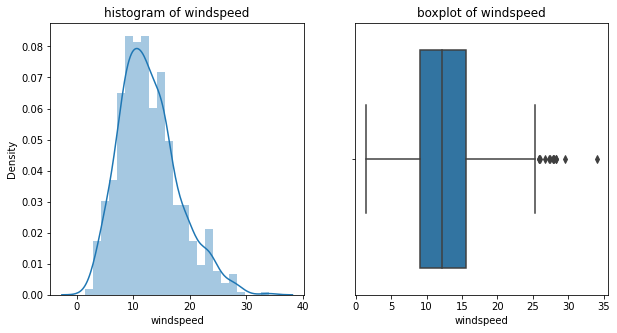

In [21]:
# histogram and boxplot
plt.figure(figsize=(10, 5))


plt.subplot(1,2,1)
plt.title("histogram of windspeed")
sns.distplot(df["windspeed"])


plt.subplot(1,2,2)
plt.title("boxplot of windspeed")
sns.boxplot(df["windspeed"])

plt.show()

### few outliers are there.

### Bivariate Analysis

### Since cnt is target variable we will do bivariate analysis based on that.

In [22]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

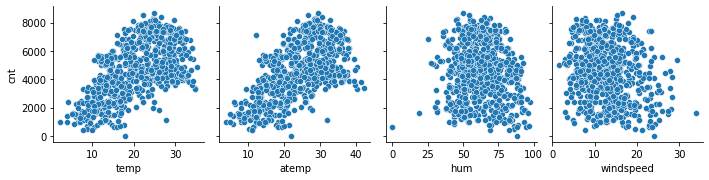

In [23]:
#Scatterplot of cnt with other variables
sns.pairplot(x_vars=["temp","atemp","hum","windspeed"],y_vars=["cnt"],data=df)

### It looks like target variable has some sort of linear relationship with some variables so we can use regression here. And 1st assumption is followed here which is target variable and predictor variables should have linear kind of relationship

<AxesSubplot:>

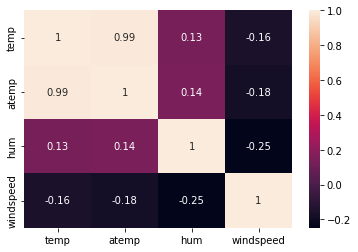

In [24]:
### to check collinearity within features
sns.heatmap(df[["temp","atemp","hum","windspeed"]].corr(),annot=True)
#plt.figure(figsize=(20,15))
#sns.heatmap(df.corr(),annot=True)

### It is clearly visible that atemp and temp are collinear as they have correlation equal to 0.99 So we can drop one out of them. I am dropping temp as atemp I am finding more explanatory in business context.

In [25]:
# dropping temp column
df=df.drop("temp",axis=1)

In [26]:
print(df.shape)
df.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


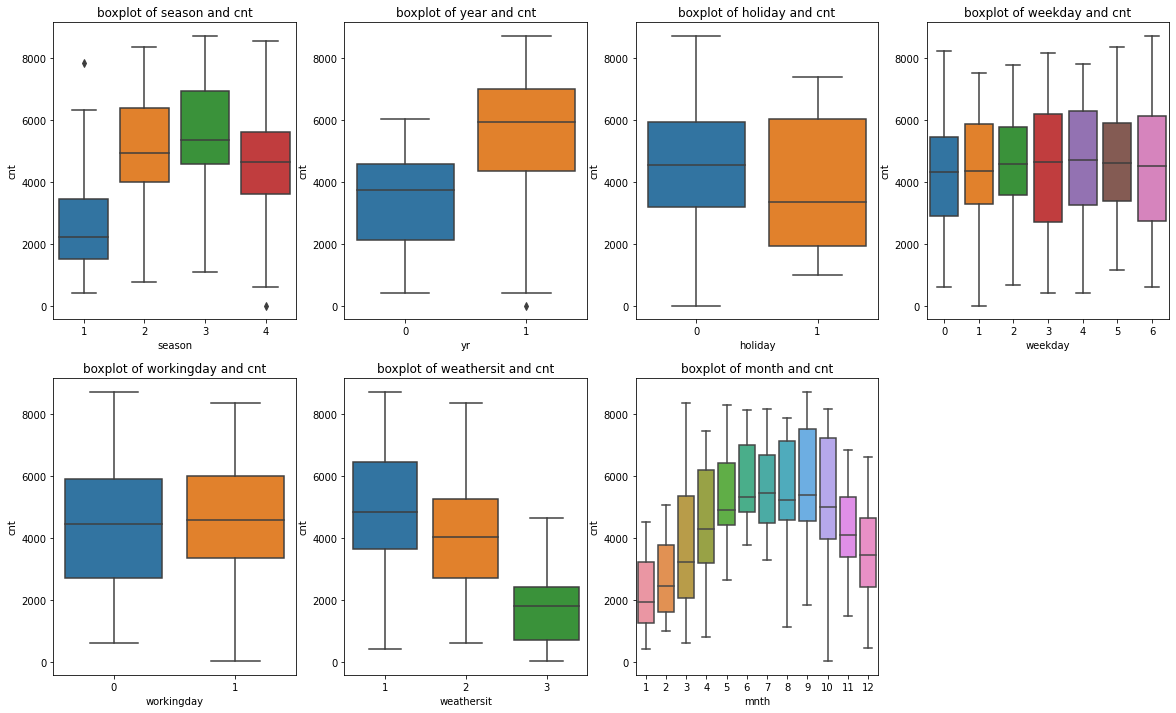

In [27]:
# Boxplots
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
plt.title("boxplot of season and cnt")
sns.boxplot(df["season"],df["cnt"])

plt.subplot(2,4,2)
plt.title("boxplot of year and cnt")
sns.boxplot(df["yr"],df["cnt"])

plt.subplot(2,4,3)
plt.title("boxplot of holiday and cnt")
sns.boxplot(df["holiday"],df["cnt"])


plt.subplot(2,4,4)
plt.title("boxplot of weekday and cnt")
sns.boxplot(df["weekday"],df["cnt"])

plt.subplot(2,4,5)
plt.title("boxplot of workingday and cnt")
sns.boxplot(df["workingday"],df["cnt"])

plt.subplot(2,4,6)
plt.title("boxplot of weathersit and cnt")
sns.boxplot(df["weathersit"],df["cnt"])

plt.subplot(2,4,7)
plt.title("boxplot of month and cnt")
sns.boxplot(df["mnth"],df["cnt"])

plt.show()

### The maximum difference in cnt is observed based on year variable and weathersit variable across their different categories and rest other variables across their categories dont show as much significant difference.

In [28]:
# Weathersit has only 3 type of values however in data dictionary 4 types are given.
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Data Preparation

### Since some variable like mnth, season  are present as numerical variable in dataset which by default giving them a order so we need to convert them into dummy variables so that there will be no order in them.

### Dummy Variables creation

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [30]:
dummy_var=["season","mnth","weekday","weathersit"]


In [31]:
# to create dummy variables
df = pd.get_dummies(df, prefix=["season","month","weekday","wtst"], prefix_sep='', 
                            columns=dummy_var,drop_first=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
print(df.shape)
print(df.columns)

(730, 29)
Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season2', 'season3', 'season4', 'month2', 'month3', 'month4', 'month5',
       'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12',
       'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6',
       'wtst2', 'wtst3'],
      dtype='object')


### Now our data is ready

### Train and test split

In [33]:
from sklearn.model_selection import train_test_split
# random_state is used so that we always get same rows for test and train data.
df_train, df_test = train_test_split(df, train_size = 0.7,  random_state = 100)

In [34]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   atemp       220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   cnt         220 non-null    int64  
 7   season2     220 non-null    uint8  
 8   season3     220 non-null    uint8  
 9   season4     220 non-null    uint8  
 10  month2      220 non-null    uint8  
 11  month3      220 non-null    uint8  
 12  month4      220 non-null    uint8  
 13  month5      220 non-null    uint8  
 14  month6      220 non-null    uint8  
 15  month7      220 non-null    uint8  
 16  month8      220 non-null    uint8  
 17  month9      220 non-null    uint8  
 18  month10     220 non-null    uint8  
 19  month11     220 non-null   

### Scaling

### There can be two approches here and I will solve using Normalisation.

1. Scaling using Normalisation.
2. Scaling using Standardisation.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
num_vars=["atemp","hum","windspeed","cnt"]

In [40]:
# Normalisation
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:

y_train=df_train.pop("cnt")
x_train=df_train

### Model Building

There can be multiple approaches:

* You start with one variable and keep adding variable based on statistics but that is tedious.(Manual)
* You start with all variable and eliminate variable based on statistics but that is again tedious.(Manual)
* You automate with RFE.(Automatic)

### We will take hybrid approch that is Coarse tuning(RFE) and then Manual tuning based on statistics.

### RFE(Coarse Tuning)

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to approximately half which is 15.
lm = LinearRegression()
#lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [45]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season2', True, 1),
 ('season3', True, 1),
 ('season4', True, 1),
 ('month2', False, 14),
 ('month3', False, 9),
 ('month4', False, 8),
 ('month5', False, 11),
 ('month6', False, 6),
 ('month7', False, 2),
 ('month8', False, 5),
 ('month9', False, 12),
 ('month10', False, 10),
 ('month11', False, 7),
 ('month12', False, 13),
 ('weekday1', True, 1),
 ('weekday2', True, 1),
 ('weekday3', True, 1),
 ('weekday4', True, 1),
 ('weekday5', True, 1),
 ('weekday6', False, 4),
 ('wtst2', False, 3),
 ('wtst3', True, 1)]

In [46]:
col = x_train.columns[rfe.support_]
col=list(col)
print(len(col))
col

15


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'weekday1',
 'weekday2',
 'weekday3',
 'weekday4',
 'weekday5',
 'wtst3']

### These are top 15 best column according to rfe.

In [47]:
# columns which we are discarding based on rfe values
x_train.columns[~rfe.support_]

Index(['month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8',
       'month9', 'month10', 'month11', 'month12', 'weekday6', 'wtst2'],
      dtype='object')

### Manual Tuning

### Building model using statsmodel for detailed statistics

In [48]:
x_train_new=x_train[col]

In [49]:
x_train_new.shape

(510, 15)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 16)

In [51]:
model = sm.OLS(y_train,x_train_new).fit()   # Running the linear model

In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.75e-172
Time:                        00:34:06   Log-Likelihood:                 472.04
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     495   BIC:                            -850.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2480      0.028      8.813      0.0

In [53]:
# Finding vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
10,weekday1,inf
11,weekday2,inf
12,weekday3,inf
13,weekday4,inf
14,weekday5,inf
0,const,42.63
8,season3,4.36
4,atemp,3.11


### Based on summary statistics and vif we will drop weekday5 first

### Model 2

In [54]:
col.remove("weekday5")
print(len(col))
col

14


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'weekday1',
 'weekday2',
 'weekday3',
 'weekday4',
 'wtst3']

In [55]:
x_train_new=x_train[col]
x_train_new.shape

(510, 14)

In [56]:
# Adding a constant variable
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 15)

In [57]:
model2 = sm.OLS(y_train,x_train_new).fit()

In [58]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.75e-172
Time:                        00:34:06   Log-Likelihood:                 472.04
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     495   BIC:                            -850.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2480      0.028      8.813      0.0

In [59]:
# finding vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.63
8,season3,4.36
4,atemp,3.11
7,season2,2.48
3,workingday,2.47
10,weekday1,1.94
12,weekday3,1.92
9,season4,1.87
13,weekday4,1.79
11,weekday2,1.77


### Again based on summary statistics and vif we will drop weekday3

### Model3

In [60]:
col.remove("weekday3")
print(len(col))
col

13


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'weekday1',
 'weekday2',
 'weekday4',
 'wtst3']

In [61]:
x_train_new=x_train[col]
x_train_new.shape

(510, 13)

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 14)

In [63]:
model3 = sm.OLS(y_train,x_train_new).fit()

In [64]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.07e-173
Time:                        00:34:06   Log-Likelihood:                 472.04
No. Observations:                 510   AIC:                            -916.1
Df Residuals:                     496   BIC:                            -856.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2480      0.028      8.825      0.0

In [65]:
# finding vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.61
8,season3,4.36
4,atemp,3.10
7,season2,2.48
9,season4,1.87
3,workingday,1.51
10,weekday1,1.39
12,weekday4,1.28
11,weekday2,1.27
2,holiday,1.25


### Based on summary statistics and vif we will drop weekday4

### Model4

In [66]:
col.remove("weekday4")
print(len(col))
col

12


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'weekday1',
 'weekday2',
 'wtst3']

In [67]:
x_train_new=x_train[col]
x_train_new.shape

(510, 12)

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 13)

In [69]:
model4 = sm.OLS(y_train,x_train_new).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.65e-174
Time:                        00:34:06   Log-Likelihood:                 471.93
No. Observations:                 510   AIC:                            -917.9
Df Residuals:                     497   BIC:                            -862.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2476      0.028      8.822      0.0

In [70]:
# finding vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.57
8,season3,4.36
4,atemp,3.10
7,season2,2.48
9,season4,1.87
3,workingday,1.27
5,hum,1.24
10,weekday1,1.24
2,holiday,1.21
6,windspeed,1.18


### Based on summary statistics and vif we will drop weekday1

### Model5

In [71]:
col.remove("weekday1")
print(len(col))
col

11


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'weekday2',
 'wtst3']

In [72]:
x_train_new=x_train[col]
x_train_new.shape

(510, 11)

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 12)

In [74]:
model5 = sm.OLS(y_train,x_train_new).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.34e-175
Time:                        00:34:06   Log-Likelihood:                 470.82
No. Observations:                 510   AIC:                            -917.6
Df Residuals:                     498   BIC:                            -866.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2491      0.028      8.870      0.0

In [75]:
# finding vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.51
8,season3,4.35
4,atemp,3.10
7,season2,2.48
9,season4,1.87
5,hum,1.24
6,windspeed,1.18
3,workingday,1.14
11,wtst3,1.11
10,weekday2,1.08


### Based on summary statistics and vif we will drop weekday2

### Model6

In [76]:
col.remove("weekday2")
print(len(col))
col

10


['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'wtst3']

In [77]:
x_train_new=x_train[col]
x_train_new.shape

(510, 10)

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 11)

In [79]:
model6 = sm.OLS(y_train,x_train_new).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.96e-176
Time:                        00:34:06   Log-Likelihood:                 470.51
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     499   BIC:                            -872.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.028      8.899      0.0

In [80]:
# finding vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.48
8,season3,4.35
4,atemp,3.10
7,season2,2.48
9,season4,1.87
5,hum,1.24
6,windspeed,1.18
10,wtst3,1.11
2,holiday,1.07
3,workingday,1.07


### Based on summary statistics and vif we will drop workingday

### Model7

In [81]:
col.remove("workingday")
print(len(col))
col

9


['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'wtst3']

In [82]:
x_train_new=x_train[col]
x_train_new.shape

(510, 9)

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_new = sm.add_constant(x_train_new)
x_train_new.shape

(510, 10)

In [84]:
model7 = sm.OLS(y_train,x_train_new).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     244.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.32e-177
Time:                        00:34:06   Log-Likelihood:                 469.09
No. Observations:                 510   AIC:                            -918.2
Df Residuals:                     500   BIC:                            -875.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2601      0.027      9.490      0.0

In [85]:
# finding vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.38
7,season3,4.35
3,atemp,3.10
6,season2,2.48
8,season4,1.87
4,hum,1.24
5,windspeed,1.17
9,wtst3,1.11
1,yr,1.03
2,holiday,1.01


### Since now all variables are significant we will not drop any however vif of constant is very high, but we will keep it for interpretation. And model7 is our final model with rsquare and adjusted rsquare on train set equal to 0.815 and 0.812  respectively.

In [86]:
model7.params

const        0.260119
yr           0.229743
holiday     -0.076793
atemp        0.528834
hum         -0.249226
windspeed   -0.181597
season2      0.118899
season3      0.088996
season4      0.164233
wtst3       -0.192300
dtype: float64

In [87]:
col

['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'season2',
 'season3',
 'season4',
 'wtst3']

### Top features are

* yr (year whether 2018 or 2019))
* holiday (holiday)
* atemp (feeling temperature in Celsius
* hum (humidity)
* windspeed (windspeed)
* season4 (winter)
* month5 (may)
* month9 (september)
* wtst3 (light snow)

### Above are the top 9 features contributing to demand of shared bikes.

### So the eqn of model is

#### cnt = 0.278 + 0.229*yr  - 0.092*holiday + 0.632*atemp - 0.290*hum - 0.164*windspeed  + 0.118*season4 + 0.074*month5 +  0.091*month9 - 0.184*wtst3

### Based on coefficients top three variables are
### atemp (feeling temperature in Celsius)
### hum (humidity)
### yr (year whether 2018 or 2019)

### Residual Analysis of train data and Assumption Validation

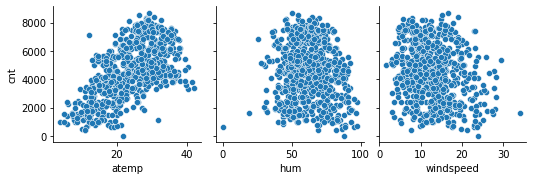

In [88]:
#Scatterplot of target variable(cnt) with other variables
sns.pairplot(x_vars=["atemp","hum","windspeed"],y_vars=["cnt"],data=df)

### Assumption 1 (Linear Relationship)

#### There is some sort of linearity between target variable and predictors so we can use linear regression here.

In [89]:
y_train_pred=model7.predict(x_train_new)

In [90]:
y_train_pred

576    0.755218
426    0.516086
728    0.351264
482    0.655962
111    0.291061
         ...   
578    0.811427
53     0.246926
350    0.320118
79     0.322951
520    0.696110
Length: 510, dtype: float64

In [91]:
residuals=y_train - y_train_pred
print(residuals)

576    0.072439
426   -0.050831
728   -0.147168
482   -0.172989
111   -0.099966
         ...   
578    0.021408
53    -0.028910
350   -0.007531
79    -0.086527
520    0.106812
Length: 510, dtype: float64


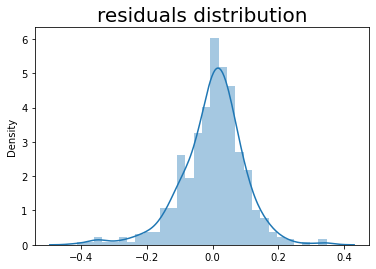

-6.983520515681377e-16


In [92]:
# Plot the histogram of the error terms
sns.distplot(residuals)
plt.title('residuals distribution', fontsize = 20)                
plt.show()
print(np.mean(residuals))

###  Assumption 2 (Normal distribution of residuals)
#### Residuals terms are following  normal distribution with mean approximately zero so Assumption 2 is also followed.

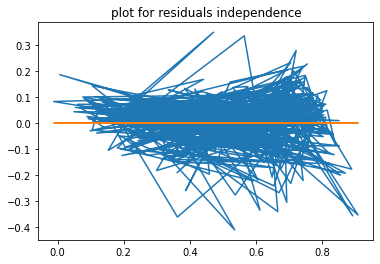

In [93]:
# Making a list of zeros with same dimension as y_train_pred
zeros=[]
for i in range(510):
    zeros.append(0)

plt.title('plot for residuals independence')
plt.plot(y_train_pred,residuals)
plt.plot(y_train_pred,zeros)
plt.show()


### Assumption3 (Residuals Independence)
#### Since residuals do not form any pattern, they are random and independent of each other, so Assumption 3rd is 

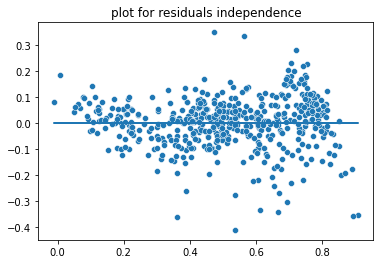

In [94]:
# Making a list of zeros with same dimension as y_train_pred
zeros=[]
for i in range(510):
    zeros.append(0)

plt.title('plot for residuals independence')
sns.scatterplot(y_train_pred,residuals)
plt.plot(y_train_pred,zeros)
plt.show()

### Assumption4 (Homoscedasticity)
#### Since most of residuals have almost same variance along regression line so Assumption 4th is also followed here. 

### Assumption5 (No Collinearity and No Multicollinearity)
#### we have removed all collinear and multicollinear columns during model building so this assumption is also followed.

### Predictions on test data

In [95]:
df.shape

(730, 29)

In [96]:
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 29)


In [97]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
184,0,1,0,33.27085,63.7917,5.459106,6043,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,36.04875,59.2083,7.625404,6211,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
num_vars=["atemp","hum","windspeed","cnt"]

In [99]:
# Normalising
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season2,season3,season4,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into x_test and y_test

In [101]:
y_test = df_test.pop('cnt')
x_test = df_test

In [102]:
x_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,season2,season3,season4,month2,...,month11,month12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,wtst2,wtst3
184,0,1,0,0.769660,0.657364,0.084219,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
print(col)

['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season2', 'season3', 'season4', 'wtst3']


In [104]:
x_test_new=x_test[col]

In [105]:
x_test_new.shape

(220, 9)

In [106]:
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)
x_test_new.shape

(220, 10)

In [107]:
y_test_pred= model7.predict(x_test_new)

In [108]:
y_test_pred

184    0.500219
535    0.874373
299    0.417263
221    0.599119
152    0.595210
         ...   
702    0.684901
127    0.509507
640    0.801788
72     0.271124
653    0.721095
Length: 220, dtype: float64

## Model Evaluation

#### Calculating rsquare

In [109]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_test_pred)
print("r2 score on test set is ",r2_score(y_test,y_test_pred))

r2 score on test set is  0.8067521407148197


#### Calculating adjusted rsquare

In [110]:
## adjr2= 1-(((1-r2)*(n-1))/(n-p-1)) where p=predictors, n=observations

n=x_test_new.shape[0]
p=x_test_new.shape[1]
#print(n,p)

print("adjusted rsquare on test set is ",1-(((1-rsquare)*(n-1))/(n-p-1))   )

adjusted rsquare on test set is  0.7975058316581125


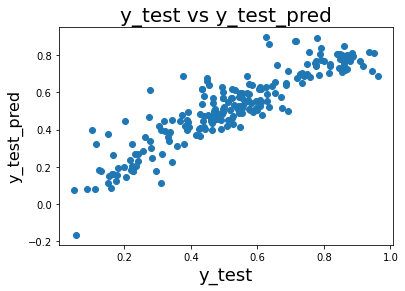

In [111]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()